<a href="https://colab.research.google.com/github/TaMaN2031A/AI-in-medicine-Ethical-Approach/blob/main/Hands-On%20Machine%20Learning%20with%20Scikit-Learn%2C%20Keras%2C%20and%20TensorFlow%2C%203rd%20Edition-9781098125967.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ageron Book

## Chapter 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


In [ ]:
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [ ]:
X  = lifesat[["GDP per capita (USD)"]]
y = lifesat[["Life satisfaction"]]

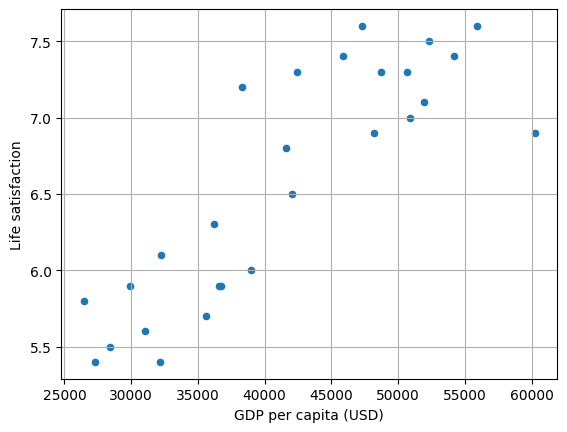

In [ ]:
lifesat.plot(kind="scatter", x="GDP per capita (USD)", y="Life satisfaction", grid=True)
plt.show()

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
X_new = [[37_655.2]]

In [ ]:
print(model.predict(X_new))

[[6.30165767]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
print(model.predict(X_new))

[[6.33333333]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


## Chapter 2

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import urllib.request
from pathlib import Path
import pandas as pd
import tarfile
import urllib

In [ ]:
def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
        housing_tarball.extractall(path="/content/datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = load_housing_data()

/tmp/ipython-input-3693632911.py:8: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="/content/datasets")


In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

KeyboardInterrupt: 

In [ ]:
# Test-Train split
import numpy as np
def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set), len(test_set)

المشكلة؟ لة شغلته تاني هيطلعلك مجموعة مختلفة = عملت تحديث للنموذج بيها = سربت بيانات = over fitting  
تستخدم سييد؟ مش حل برده ليه؟ أول ما تحدث البيانات او تجيب بيانات جديدة هتحصل نفس المشاكل  

In [ ]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]


المشكلة لازم تتاكد ان مفيش id ديد هيخش يبقى مثل القدام  


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
# Enhancement if data is small: Stratified Sampling
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [ ]:
housing["income_cat"].value_counts().sort_index().plot(kind='bar', rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
  print(train_index, test_index)
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]
  strat_splits.append((strat_train_set, strat_test_set))



In [ ]:
strat_train_set, strat_test_set = strat_splits[0]

In [ ]:
# train_test_split fun can do this for u, but it will need u to create the categorical
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"],
                 random_state=42)

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

In [ ]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

### Explore and Visualize the Data to Gain Insights

In [ ]:
# If u wanna start manipulations: make a copy of the orig data so as you don't
# load it from the files over and over again
housing = strat_train_set.copy()

In [ ]:
# Just like in the bioinformatics: u need to visualize the data to have an idea over it
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=.2)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

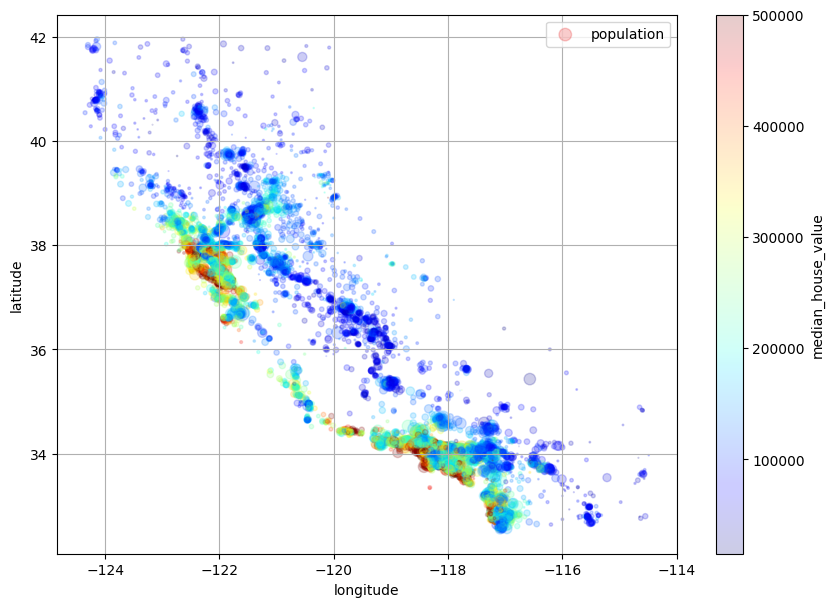

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"]/100, alpha=.2,
             label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             legend=True, sharex=False, figsize=(10,7))


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

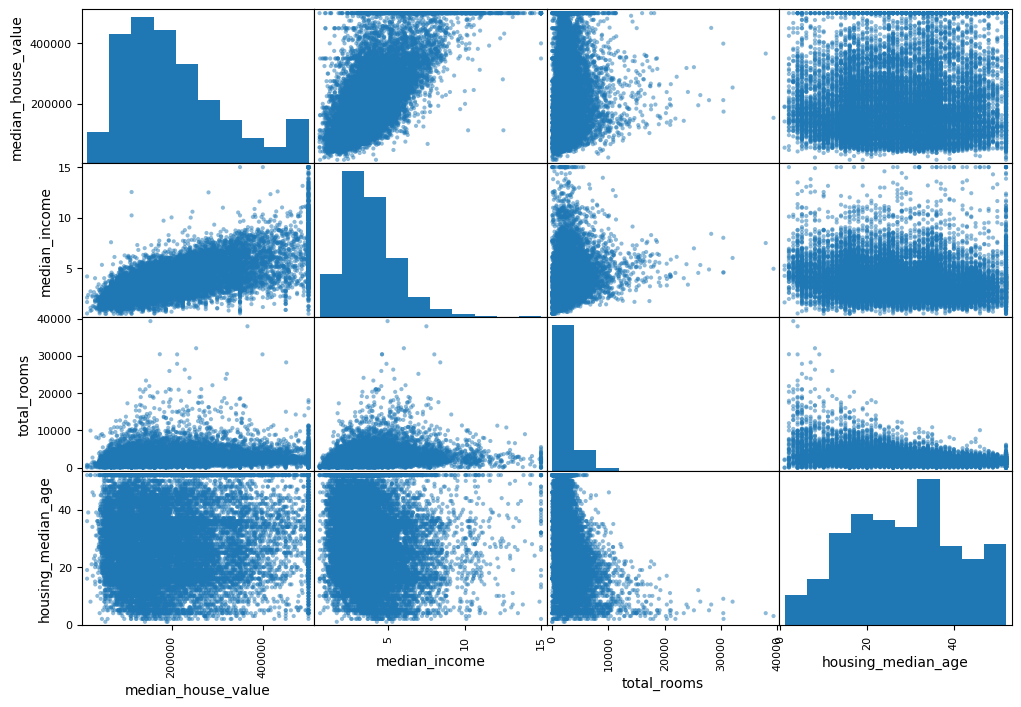

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

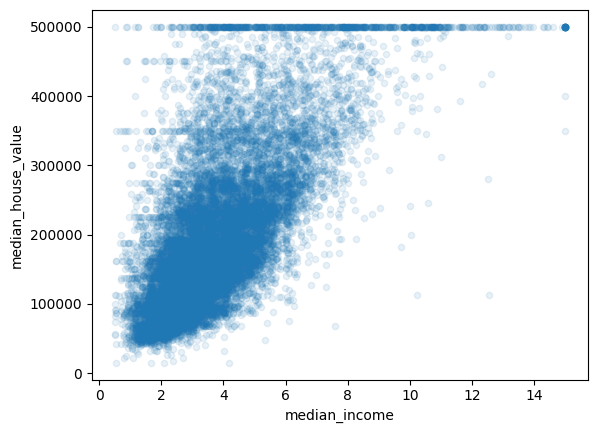

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=.1)

### Prepare the Data for Machine Learning Algorithms

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
# Handling NA values (Remove affectd rows, the bad column or imputation)
#housing.dropna(subset=["total_bedrooms"], inplace=True) # option 1
#housing.drop("total_bedrooms", axis=1) # option 2
#median = housing["total_bedrooms"].median() # option 3
#housing["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [ ]:
housing_numerical = housing.select_dtypes(include=[np.number])

In [ ]:
imputer.fit(housing_numerical)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [ ]:
housing_numerical.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [ ]:
x = imputer.transform(housing_numerical)

In [ ]:
housing_tr = pd.DataFrame(x, columns=housing_numerical.columns, index=housing_numerical.index)

### Handling Text and Categorical Attributes

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

المشكلة في التمثيل السايق انه هيخلي النموذج يعتقد ان الألجورذمات القريبة من بعدها في القيمة = 2 و 3 مثلا
هم قريبين من بعض فعلا: فما الحل اذن؟ وان هوت انكودنج

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", 'NEAR BAY']})

In [ ]:
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [ ]:
cat_encoder.transform(df_test).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

ما يميز السكيليرنية عن اختها الباندية هو الذاكرة الحاضرة عند الأولى؛ فهي تتذكر ما تم تدريبها عليه

In [ ]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [ ]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [ ]:
df_output = pd.DataFrame(cat_encoder.transform(df_test).toarray(), columns=cat_encoder.get_feature_names_out())

### Feature Scaling and Transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_numerical)

In [ ]:
housing_num_min_max_scaled[:10]

array([[-0.60851927,  0.11702128,  1.        , -0.83117147, -0.64116605,
        -0.80701754, -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, -0.90014752, -0.88629409,
        -0.91866029, -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, -0.94501246, -0.93042358,
        -0.93141946, -0.92458466, -0.73336919],
       [ 0.46855984, -0.74468085, -0.37254902, -0.78778168, -0.7262039 ,
        -0.77401546, -0.70916558, -0.75698266],
       [ 0.25760649, -0.74042553,  0.37254902, -0.77801516, -0.6102432 ,
        -0.76579561, -0.56281501, -0.58217128],
       [-0.38336714,  0.15106383,  1.        , -0.90706547, -0.90336608,
        -0.91522513, -0.88127683, -0.60735714],
       [ 0.21501014, -0.72340426,  0.29411765, -0.94485986, -0.93686584,
        -0.93792173, -0.9413851 , -0.22574861],
       [-0.54969574,  0.03404255,  0.37254902, -0.75660003, -0.71042036,
        -0.7502147 , -0.66809782, -0.32326451],
       [ 0.19878296, -0.62553191

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
housing_num_standard_scaled = standard_scaler.fit_transform(housing_numerical)

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing_numerical[["housing_median_age"]], [[35.]])
age_simil_35

array([[3.08244070e-126],
       [1.38879439e-011],
       [1.83156389e-002],
       ...,
       [6.33097734e-211],
       [1.83156389e-002],
       [6.63967720e-036]])

In [ ]:
from sklearn.linear_model import LinearRegression
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]
scaled_predictions = model.predict(some_new_data)
target_scaler.inverse_transform(scaled_predictions)

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [ ]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [ ]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

In [ ]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func = np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [ ]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35]], gamma =0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [ ]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
class StandardScalerClone(BaseEstimator, TransformerMixin):
  def __init__(self, with_mean=True):
    self.with_mean = with_mean

  def fit(self, X, y=None):
    X = check_array(X)
    self.mean_ = X.mean(axis=0)
    self.scale_ = X.std(axis=0)
    self.n_features_in_ = X.shape[1]
    return self

  def transform(self, X):
    check_is_fitted(self)
    X = check_array(X)
    assert self.n_features_in_ == X.shape[1]
    if self.with_mean:
      X = X - self.mean_
    return X / self.scale_

In [ ]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
    self.n_clusters = n_clusters
    self.gamma = gamma
    self.random_state = random_state

  def fit(self, X, y=None, sample_weight=None):
    self.Kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
    self.Kmeans_.fit(X, sample_weight=sample_weight)
    return self

  def transform(self, X):
    return rbf_kernel(X, self.Kmeans_.cluster_centers_, gamma=self.gamma)

  def get_feature_names_out(self, names=None):
    return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight=housing_labels)
similarities[0]

array([7.76542973e-17, 9.79800335e-01, 5.48714294e-08, 1.39802338e-23,
       9.63314534e-04, 1.37867731e-04, 1.27105542e-01, 5.54756787e-01,
       4.68660945e-14, 5.60181642e-01])

In [ ]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [ ]:
import sklearn
sklearn.set_config(display="diagram")

In [ ]:
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [ ]:
# if u don't want to name anything
from sklearn.pipeline import make_pipeline
num_pipelin_without_names = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [ ]:
num_pipelin_without_names

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
housing_num_prepared = num_pipeline.fit_transform(housing_numerical)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [ ]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
                                       index=housing_numerical.index)


In [ ]:
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


In [ ]:
num_pipeline[0]

SimpleImputer(strategy='median')

In [ ]:
num_pipelin_without_names[0]

SimpleImputer(strategy='median')

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms",
               "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OneHotEncoder(handle_unknown="ignore"))
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [ ]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

In [ ]:
from sklearn.compose import make_column_selector
preprocessing_pp = ColumnTransformer([
    ("num", num_pipeline, make_column_selector(dtype_include=np.number)),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
])

In [ ]:
preprocessing_pp

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7d0f809f8920>),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7d0f809fa930>)])

In [ ]:
housing_prepared = preprocessing_pp.fit_transform(housing)

In [ ]:
df_housing_prepared = pd.DataFrame(housing_prepared, columns=preprocessing_pp.get_feature_names_out(),
                                       index=housing.index)

In [ ]:
df_housing_prepared

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Whole preprocessing pipeline
def column_ratio(X):
  return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
  return ["ratio"]

def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy="median"),
      FunctionTransformer(column_ratio, feature_names_out=ratio_name),
      StandardScaler()
  )

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
preprocessing = ColumnTransformer(
    [
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                           "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
    ], remainder=default_num_pipeline)


In [ ]:
preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x7d0f8174a480>,
                                                                      func=<function column_ratio...
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('geo',
                                 ClusterSimilarity(gamma=1, random_state=42),
                                 ['latitude', 'longitude']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7d0f83f50da0>)])

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)

In [ ]:
housing_prepared.shape

(16512, 24)

In [ ]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7d0...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(gamma=1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d0f83f50da0>)])),
                ('linearregression', LinearRegression())])

In [ ]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([246000., 372700., 135700.,  91400., 330900.])

In [ ]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [ ]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, housing_predictions)

In [ ]:
from math import sqrt

sqrt(lin_rmse)

68972.88910758484

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7d0...
                                                  ClusterSimilarity(gamma=1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d0f83f50da0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
housing_predictions__ = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions__)

In [ ]:
sqrt(tree_rmse)

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring = "neg_root_mean_squared_error", cv=10)

In [ ]:
tree_rmses

array([64607.89604624, 66409.0627187 , 66203.41031283, 65863.76434319,
       68086.79141027, 66534.53308312, 66923.49892937, 68532.21066423,
       66367.48227837, 66208.69621463])

In [ ]:
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,66573.734600
std,1103.402323
min,64607.896046
25%,66204.731788
50%,66388.272499
75%,66826.257468
max,68532.210664


In [ ]:
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels, scoring = "neg_root_mean_squared_error", cv=10)

In [ ]:
lin_rmses

array([69857.22858234, 68416.6472971 , 65504.76575251, 81037.86374147,
       69063.09688723, 68424.89361011, 67952.06647592, 71179.43136955,
       68090.53867535, 70507.51578923])

In [ ]:
pd.Series(lin_rmses).describe()

,0
count,10.000000
mean,70003.404818
std,4182.188328
min,65504.765753
25%,68172.065831
50%,68743.995249
75%,70344.943988
max,81037.863741


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)


KeyboardInterrupt: 

In [ ]:
pd.Series(forest_rmses).describe()

In [ ]:
from sklearn.model_selection import GridSearchCV
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
    'random_forest__max_features': [4, 6, 8]},

   {'preprocessing__geo__n_clusters': [10, 15],
    'random_forest__max_features': [6, 8, 10]},
]


In [ ]:
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.cv_results_

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}
rnd_search = RandomizedSearchCV(
full_pipeline, param_distributions=param_distribs, n_iter=10,
cv=3,
scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(housing, housing_labels)

In [ ]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

In [ ]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()), reverse=True)

In [ ]:
X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()


In [ ]:
final_predictions = final_model.predict(X_test)

In [ ]:
final_rmse = mean_squared_error(y_test, final_predictions)
print(final_rmse)

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

In [ ]:
import joblib
joblib.dump(final_model, "my_california_housing_model.pkl")

## Chapter 3

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [ ]:
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
mnist["data"]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
mnist["target"]

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
X, y = mnist.data, mnist.target

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

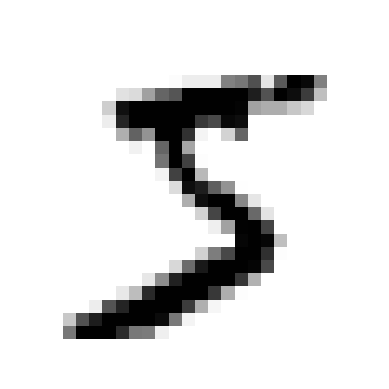

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

plot_digit(X[0])

In [ ]:
y[0]

'5'

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
type(X)

numpy.ndarray

In [ ]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

In [ ]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([X_train[0]])

array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

KeyboardInterrupt: 

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

In [ ]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

### Implementing Cross-validation

In [ ]:
"""
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

"""

'\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.base import clone\n\nskfolds = StratifiedKFold(n_splits=3)\n\nfor train_index, test_index in skfolds.split(X_train, y_train_5):\n    clone_clf = clone(sgd_clf)\n    X_train_folds = X_train[train_index]\n    y_train_folds = y_train_5[train_index]\n    X_test_fold = X_train[test_index]\n    y_test_fold = y_train_5[test_index]\n\n    clone_clf.fit(X_train_folds, y_train_folds)\n    y_pred = clone_clf.predict(X_test_fold)\n    n_correct = sum(y_pred == y_test_fold)\n    print(n_correct / len(y_pred))\n\n'

### Confusion Matrices

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
# The first row of this matrix considers non-5 images (the negative class)

In [ ]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

Now our 5-detector does not look as shiny as it did when we looked at its accuracy. When it claims an image represents a 5, it is correct only 83.7% of
the time. Moreover, it only detects 65.1% of the 5s.  
The F1 score favors classifiers that have similar precision and recall. This is not
always what you want: in some contexts you mostly care about precision, and
in other contexts you really care about recall. For example, if you trained a
classifier to detect videos that are safe for kids, you would probably prefer a
classifier that rejects many good videos (low recall) but keeps only safe ones
(high precision), rather than a classifier that has a much higher recall but lets a
few really bad videos show up in your product (in such cases, you may even
want to add a human pipeline to check the classifier’s video selection). On the
other hand, suppose you train a classifier to detect shoplifters in surveillance
images: it is probably fine if your classifier only has 30% precision as long as it
has 99% recall (sure, the security guards will get a few false alerts, but almost
all shoplifters will get caught).
Unfortunately, you can’t have it both ways: increasing precision reduces recall,
and vice versa. This is called the precision/recall trade-off.

In [ ]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [ ]:
y_scores = sgd_clf.decision_function([X_train[0]])
y_scores

array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

The SGDClassifier uses a threshold equal to 0, so the preceding code returns the same result as the predict() method (i.e., True).

In [ ]:
# raising the threshold => decreases recall (it becomes harder to be a positive)
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
precisions, recalls, thresholds

(array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
          38871.26391927,   42216.05562787,   49441.43765905]))

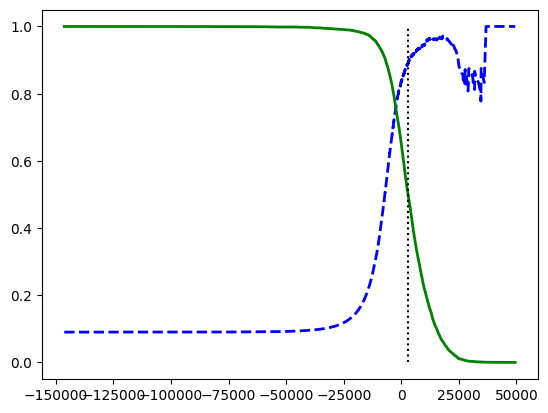

In [ ]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show()

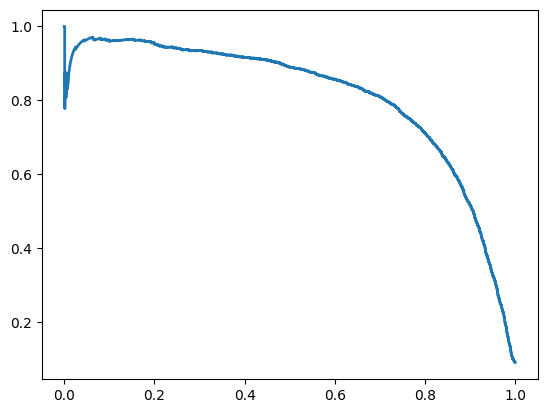

In [ ]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

In [ ]:
idx_for_90_precision = (precisions >= 0.9).argmax()
print(len(precisions), idx_for_90_precision)

60001 57109


In [ ]:
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.0194991439557)

In [ ]:
# Here is how to use this threshold to predict
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

If someone says, “Let’s reach 99% precision”, you should ask, “At what
recall[cost]?”

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


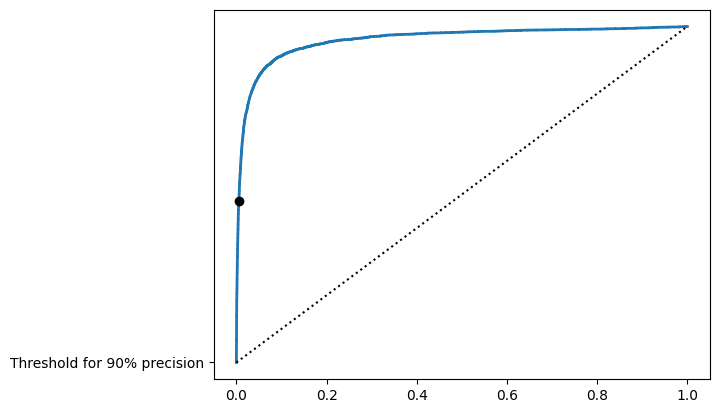

In [ ]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", "Threshold for 90% precision")
plt.show()

In [ ]:
# Area under the curve => closer to one the bitter
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

In [ ]:
# Pure random classifier => 0.5
roc_auc_score(y_train_5, dummy_clf.predict(X_train))

np.float64(0.5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [ ]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [ ]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

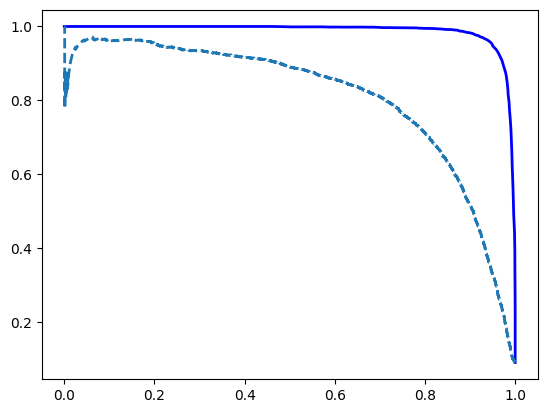

In [ ]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.show()

In [ ]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
y_train_pred_forest

array([ True, False, False, ...,  True, False, False])

In [ ]:
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [ ]:
print(roc_auc_score(y_train_5, y_train_pred_forest))

0.9358174809192218


In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [ ]:
svm_clf.predict([X_train[0]])

array(['5'], dtype=object)

In [ ]:
svm_clf.decision_function([X_train[0]]).round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [ ]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

Logistic reg, random forest, gaussian NB :  Can be multi class classifiers
SGD, SVC: Binary only

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
len(ovr_clf.estimators_)


10

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SVC(random_state=42))
ovo_clf.fit(X_train[:2000], y_train[:2000])

OneVsOneClassifier(estimator=SVC(random_state=42))

In [ ]:
len(ovo_clf.estimators_)

45

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
sgd_clf.predict([X_train[0]])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy", verbose=1)

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)
print(any(dummy_clf.predict(X_train)))
cross_val_score(dummy_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))


In [ ]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

### Error Analysis

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true",
                                        values_format=".0%")
plt.show()

In [ ]:
# Count those who are incorrect only
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true",
                                        sample_weight=sample_weight,
                                        values_format=".0%")
plt.show()

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="pred",
                                        sample_weight=sample_weight,
                                        values_format=".0%")
plt.show()

### Multilabel Classification

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_train_large

array([False, False, False, ..., False, False,  True])

In [ ]:
y_multilabel = np.c_[y_train_large, y_train_odd]

In [ ]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([X_train[0]])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

This approach assumes that all labels are equally important, which may not be
the case. In particular, if you have many more pictures of Alice than of Bob or
Charlie, you may want to give more weight to the classifier’s score on pictures
of Alice

In [ ]:
 f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

Here weighted is almost identitical to macro since classes (odd true vs odd false) are qually distributed, large is almost equally distributed also

In [ ]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [ ]:
chain_clf.predict([X_train[0]])

array([[0., 1.]])

### Multioutput Classification (Multilabel + Multivalues per label)

اني اشيل دوشة ده يعتبر مثال على هذه المسألة
عند س بكسل؛ كل بكسل لها ص قيمة

The line between classification and regression is sometimes blurry, such
as in this example. Arguably, predicting pixel intensity is more akin to
regression than to classification. Moreover, multioutput systems are not
limited to classification tasks; you could even have a system that outputs
multiple labels per instance, including both class labels and value labels.

> شرح الكتاب



In [ ]:
import numpy as np

np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

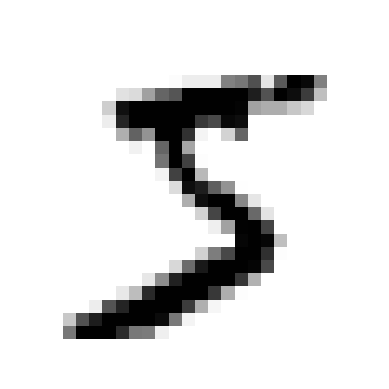

In [ ]:
plot_digit(X_train[0])

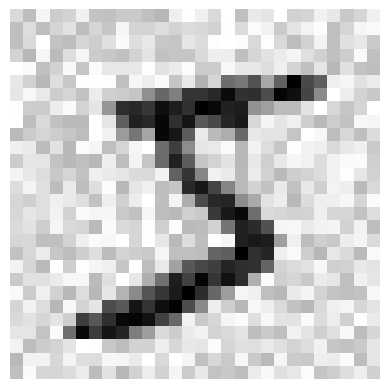

In [ ]:
plot_digit(X_train_mod[0])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

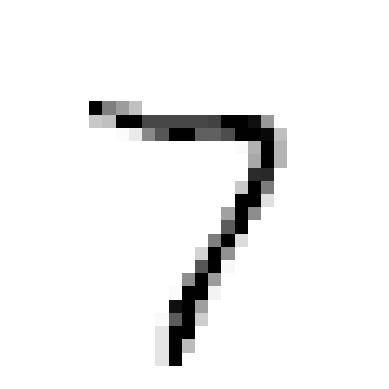

In [ ]:
plot_digit(knn_clf.predict([X_test_mod[0]]))

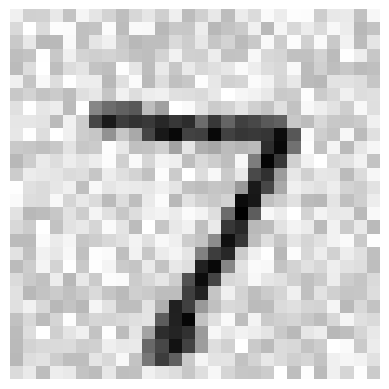

In [ ]:
plot_digit(X_test_mod[0])

### Exercise

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf_97 = KNeighborsClassifier()
knn_clf_97.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score


cross_val_score(knn_clf_97, X_train, y_train, cv=3, scoring="accuracy")

KeyboardInterrupt: 

In [ ]:
y_test_pred = knn_clf_97.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.9688

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'weights':['uniform', 'distance'], 'n_neighbors':list(range(1, 10, 2))}

grid_search = GridSearchCV(knn_clf_97, parameters, cv=3, scoring='accuracy')


In [ ]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.35021186, 0.24645607, 0.22673933, 0.24936096, 0.28359946,
        0.27398984, 0.22536588, 0.24384514, 0.24256698, 0.24384308]),
 'std_fit_time': array([0.13179695, 0.02823989, 0.00885062, 0.02933718, 0.08404552,
        0.02520216, 0.00221301, 0.02599073, 0.02819431, 0.02855157]),
 'mean_score_time': array([62.4136049 , 61.54920141, 58.99596842, 58.79693158, 61.22777836,
        62.77887686, 60.38404441, 59.9352115 , 59.4525826 , 58.18708396]),
 'std_score_time': array([3.35631624, 2.38602006, 1.18933015, 1.10953726, 1.11580946,
        2.91299519, 0.80988918, 1.38065715, 1.55089989, 0.70402081]),
 'param_n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5, 7, 7, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance', 'uniform', 'distance',
        

In [ ]:
knn_clf_97_distance_3 = KNeighborsClassifier(weights='distance', n_neighbors=3)
knn_clf_97_distance_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
y_test_pred_97_dis_3 = knn_clf_97_distance_3.predict(X_test)


KeyboardInterrupt: 

In [ ]:
accuracy_score(y_test, y_test_pred_97_dis_3)
# تمت بحمد الله

0.9717

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
type(X_train[0])

numpy.ndarray

In [ ]:
import numpy as np

In [ ]:
def shift_up(x):
  xp = np.zeros(784)
  for i in range(27):
      for j in range(28):
        xp[i*28+j] = x[(i+1)*28 + j]
  return xp

def shift_down(x):
  xp = np.zeros(784)
  for i in range(1, 28):
      for j in range(28):
        xp[i*28+j] = x[(i-1)*28 + j]
  return xp

def shift_left(x):
  xp = np.zeros(784)
  for i in range(28):
      for j in range(28-1):
        xp[i*28+j] = x[(i)*28 + j + 1]
  return xp

def shift_right(x):
  xp = np.zeros(784)
  for i in range(28):
      for j in range(1, 28):
        xp[i*28+j] = x[(i)*28 + j - 1]
  return xp

In [ ]:
X_train[0].shape

(784,)

In [ ]:
def expand(X_train, y_train):
    expanded_x, expanded_y = [], []
    for (i, j) in zip(X_train, y_train):
        expanded_x.append(i)
        expanded_x.append(shift_down(i))
        expanded_x.append(shift_up(i))
        expanded_x.append(shift_left(i))
        expanded_x.append(shift_right(i))
        expanded_y.append(j);expanded_y.append(j);expanded_y.append(j);expanded_y.append(j);
        expanded_y.append(j);

    return np.array(expanded_x), np.array(expanded_y)

In [ ]:
X_train_aug, y_train_aug = expand(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape, X_train_aug.shape, y_train_aug.shape

((60000, 784), (60000,), (300000, 784), (300000,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf_97_distance_3_aug = KNeighborsClassifier(weights='distance', n_neighbors=3)
knn_clf_97_distance_3_aug.fit(X_train_aug, y_train_aug)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
y_test_pred_aug = knn_clf_97_distance_3_aug.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred_aug)
# زادت الدقة بمقدار 005 الحمد لله

0.9763

 ### Titanic Kaggle

In [ ]:
from sklearn.datasets import fetch_openml

titanic = fetch_openml("titanic", version=1, as_frame=True)

In [ ]:
titanic["DESCR"]

'**Author**: Frank E. Harrell Jr., Thomas Cason  \n**Source**: [Vanderbilt Biostatistics](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html)  \n**Please cite**:   \n\nThe original Titanic dataset, describing the survival status of individual passengers on the Titanic. The titanic data does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.\n\nThomas Cason of UVa has greatly updated and improved the titanic data frame using the Encyclopedia Titanica and created the dataset here. Some duplicate passengers have been dropped, many errors corrected, many missing ages filled in, and new v

In [ ]:
titanic["data"]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
X, y = titanic.data, titanic.target

In [ ]:
X

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
y

,survived
0,1
1,1
2,0
3,0
4,0
...,...
1304,0
1305,0
1306,0
1307,0


In [ ]:
X.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X.isnull().sum()

,0
pclass,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014
embarked,2


*   We'll impute the age with median
*   Names are not important attribute
*   sisp and parch will be tried at first, if no effect on model we'll drop them
*   The fair is to be used, as it indicates the richness of users, which could sy something about the places they were staying at in the ship
*   embarkd, gender and home.dest will be used and encoded
*   cabin, ticket, boat and body will be ignored also for the huge number of nulls


In [ ]:
X['home.dest'].value_counts()

,count
home.dest,
"New York, NY",64
London,14
"Montreal, PQ",10
"Cornwall / Akron, OH",9
"Paris, France",9
...,...
"Union Hill, NJ",1
"London New York, NY",1
"Austria Niagara Falls, NY",1


In [ ]:
X['home.dest'].value_counts().to_csv("home_dest_counts.csv", header=True)

In [ ]:
X['home.dest'] = X['home.dest'].str.rsplit(',', n=1).str[-1].str.strip()

/tmp/ipython-input-2853010189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['home.dest'] = X['home.dest'].str.rsplit(',', n=1).str[-1].str.strip()


In [ ]:
X['home.dest'].value_counts()

,count
home.dest,
NY,166
NJ,36
England,35
MA,34
MI,33
...,...
Finland New York,1
Birmingham,1
Croatia,1


In [ ]:
X['home.dest'].value_counts().to_csv("home_dest_counts_mod.csv", header=True)

In [ ]:
X['embarked'].value_counts()

,count
embarked,
S,914
C,270
Q,123


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", MinMaxScaler()),
])
cat_pipeline = Pipeline([("impute", SimpleImputer(strategy="most_frequent")),
                             ("encode", OneHotEncoder(handle_unknown="ignore"))])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ['age', 'sibsp', 'parch', 'fare']
cat_attribs = ['sex', 'pclass', 'embarked', 'home.dest']

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [ ]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  MinMaxScaler())]),
                                 ['age', 'sibsp', 'parch', 'fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'pclass', 'embarked', 'home.dest'])])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   MinMaxScaler())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'pclass', 'embarked',
                                                   'home.dest'])])),
                ('linearregression', LinearRegression())])

In [ ]:
# نقرأ الملف الخام
with open("test.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

# نشيل الـ double quotes حوالين السطر كله
cleaned = [line.strip().strip('"') for line in lines]

# نحفظه في ملف جديد
with open("clean.csv", "w", encoding="utf-8") as f:
    f.write("\n".join(cleaned))


In [ ]:
X_test = pd.read_csv("clean.csv")
print(X_test.head())


     PassengerId    pclass                                   Name     sex  \
892            3     Kelly                            Mr. James""    male   
893            3    Wilkes             Mrs. James (Ellen Needs)""  female   
894            2     Myles                   Mr. Thomas Francis""    male   
895            3      Wirz                           Mr. Albert""    male   
896            3  Hirvonen   Mrs. Alexander (Helga E Lindqvist)""  female   

      age  sibsp  parch   ticket     fare cabin embarked  
892  34.5      0      0   330911   7.8292   NaN        Q  
893  47.0      1      0   363272   7.0000   NaN        S  
894  62.0      0      0   240276   9.6875   NaN        Q  
895  27.0      0      0   315154   8.6625   NaN        S  
896  22.0      1      1  3101298  12.2875   NaN        S  


In [ ]:
X_test_DD = X_test.reindex(columns=X.columns, fill_value=0)


In [ ]:
X_test_DD

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
892,Kelly,0,male,34.5,0,0,330911,7.8292,NaN,Q,0,0,0
893,Wilkes,0,female,47.0,1,0,363272,7.0000,NaN,S,0,0,0
894,Myles,0,male,62.0,0,0,240276,9.6875,NaN,Q,0,0,0
895,Wirz,0,male,27.0,0,0,315154,8.6625,NaN,S,0,0,0
896,Hirvonen,0,female,22.0,1,1,3101298,12.2875,NaN,S,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,Spector,0,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0,0
1306,Oliva y Ocana,0,female,39.0,0,0,PC 17758,108.9000,C105,C,0,0,0
1307,Saether,0,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,0
1308,Ware,0,male,NaN,0,0,359309,8.0500,NaN,S,0,0,0


#### Choosing the Right Classifier

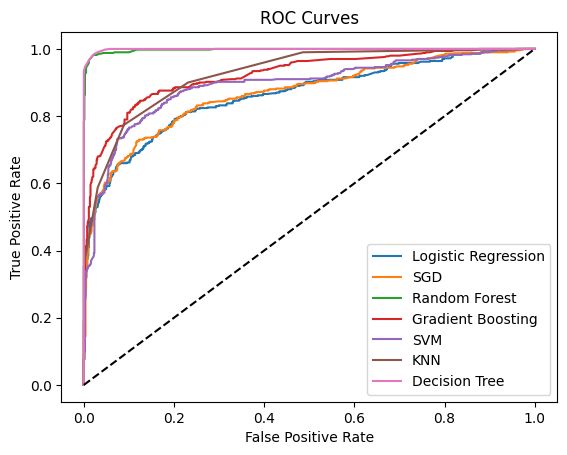

            Classifier  Accuracy  Precision  Recall        F1       AUC
0  Logistic Regression  0.805195   0.758985   0.718  0.737924  0.861633
1                  SGD  0.817418   0.809976   0.682  0.740499  0.866454
2        Random Forest  0.980138   0.981707   0.966  0.973790  0.997423
3    Gradient Boosting  0.864782   0.867882   0.762  0.811502  0.923258
4                  SVM  0.816654   0.880117   0.602  0.714964  0.891309
5                  KNN  0.858671   0.843137   0.774  0.807091  0.925342
6        Decision Tree  0.980138   0.981707   0.966  0.973790  0.998983


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.pipeline import make_pipeline

# مصنفات مختلفة
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SGD": SGDClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),   # probability=True عشان ROC
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

results = []

for name, clf in classifiers.items():
    pipe = make_pipeline(preprocessing, clf)
    pipe.fit(X, y)

    y_pred = pipe.predict(X)
    if hasattr(pipe, "predict_proba"):
        y_proba = pipe.predict_proba(X)[:,1]
    else:
        try:
            y_proba = pipe.decision_function(X)
        except:
            y_proba = None

    acc = accuracy_score(y, y_pred)
    prec = precision_score(y.astype(int), y_pred.astype(int))
    rec = recall_score(y.astype(int), y_pred.astype(int))
    f1 = f1_score(y.astype(int), y_pred.astype(int))
    auc = roc_auc_score(y.astype(int), y_proba) if y_proba is not None else None

    results.append([name, acc, prec, rec, f1, auc])

    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y.astype(int), y_proba)
        plt.plot(fpr, tpr, label=name)

plt.plot([0,1],[0,1],"k--")  # خط عشوائي
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

df_results = pd.DataFrame(results, columns=["Classifier","Accuracy","Precision","Recall","F1","AUC"])
print(df_results)


In [ ]:
clf = DecisionTreeClassifier()
pipe = make_pipeline(preprocessing, clf)
pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   MinMaxScaler())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'pclass', 'embarked',
                                                   'home.dest'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
pipe.predict(X_test_DD)

array(['0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1',
       '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0',
       '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1',
       '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1',
       '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0',
       '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0

In [ ]:
import pandas as pd

y_pred = pipe.predict(X_test_DD)

submission = pd.DataFrame({
    "PassengerId": X_test_DD.index,
    "Survived": y_pred
})

submission.to_csv("submission.csv", index=False)

print("تم حفظ الملف submission.csv")
print(submission.head())


تم حفظ الملف submission.csv
   PassengerId Survived
0          892        0
1          893        1
2          894        0
3          895        0
4          896        1


In [ ]:
pipe = make_pipeline(preprocessing, RandomForestClassifier())
pipe.fit(X, y)

y_pred = pipe.predict(X_test_DD)

submission = pd.DataFrame({
    "PassengerId": X_test_DD.index,
    "Survived": y_pred
})

submission.to_csv("submission_Random.csv", index=False)

print("تم حفظ الملف submission.csv")
print(submission.head())


تم حفظ الملف submission.csv
   PassengerId Survived
0          892        0
1          893        1
2          894        0
3          895        0
4          896        1


### Spam filter

## Chapter 4: Training Models

### Linear Regression: The Normal Equation and Linear Regression

In [1]:
import numpy as np

np.random.seed(42)

In [6]:
m = 100 # Number of samples
X = 2 * np.random.rand(m, 1) # Column vector
y = 4 + 3 * X + np.random.randn(m, 1) # Column vector

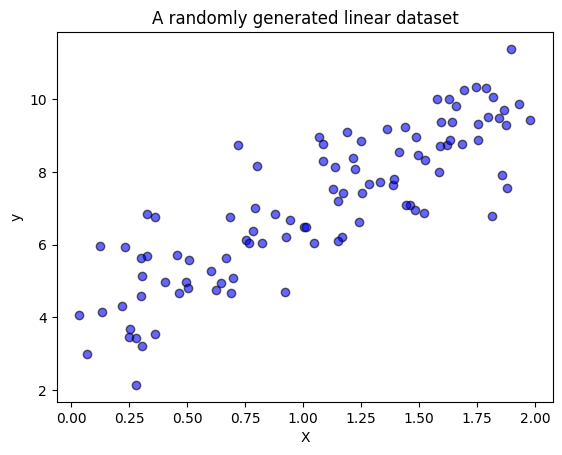

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color="blue", alpha=0.6, edgecolors="k")
plt.xlabel("X")
plt.ylabel("y")
plt.title("A randomly generated linear dataset")
plt.show()

In [9]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [10]:
theta_best

array([[3.77369425],
       [3.11791705]])

In [11]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)

In [12]:
y_predict = X_new_b @ theta_best

In [13]:
y_predict

array([[ 3.77369425],
       [10.00952834]])

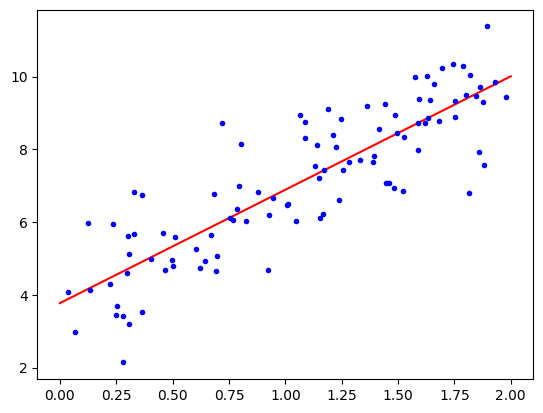

In [15]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [18]:
lin_reg.intercept_, lin_reg.coef_

(array([3.77369425]), array([[3.11791705]]))

In [19]:
lin_reg.predict(X_new)

array([[ 3.77369425],
       [10.00952834]])

## Chapter 10

# Data Science From Scratch

In [ ]:
dicty = {} # Pythonic
dicty = dict() # less Pythonic
gg = {"JOJ": 465, "AMR": 499}

In [ ]:
gg["JOJ"]

In [ ]:
gg["RYAD"]

In [ ]:
# To avoid the exception:
print(gg.get("RYAD"))

In [ ]:
gg["AMR"] = 499.5

In [ ]:
tweet = {
    "user" : "joelgrus",
    "text" : "Data Science is Awesome",
    "retweet_count" : 100,
    "hashtags" : ["#data", "#science", "#datascience", "#awesome", "#yolo"]
}

In [ ]:
tweet_key = tweet.keys()
tweet_values = tweet.values()
tweet_items = tweet.items()

"user" in tweet_key # Pythonic
"user" in tweet # Pythonic

In [ ]:
"joelgrus" in tweet_values # SLOOOW (ENTA FAHEM LEH O(n))

In [ ]:
gg[[1,2,3]] = 0

In [ ]:
gg[(1,2,3)] = 0

In [ ]:
# Default dict
doc = ["LLIDGM", "GFBDFGH", "FDHG", "FGDHGF", "FGHFG","GFH","FGFGH"]

In [ ]:
from collections import defaultdict
word_c = defaultdict(int)

In [ ]:
for word in doc:
  word_c[word]+=1

In [ ]:
word_c

# Beyond the Basic Stuff

## Chapter II

In [ ]:
from pathlib import Path
Path('spam', 'bacon', 'eggs') # If on windows: WindowsPath('spam/bacon/eggs')

In [ ]:
Path.home()

In [ ]:
from pathlib import Path
import os
Path.cwd()

In [ ]:
os.chdir("..")

In [ ]:
Path.cwd()

In [ ]:
os.chdir("content")

In [ ]:
Path.cwd()

In [ ]:
dir *py